In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Dataset\\With Mask\\00000_Mask.jpg")

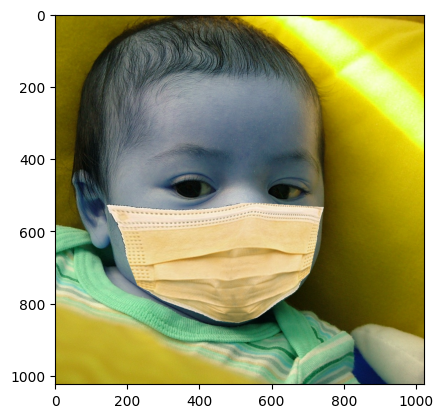

In [3]:
plt.imshow(img_array) #BRG

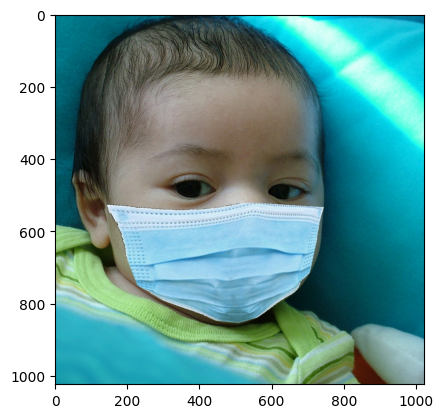

In [4]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [5]:
img_array.shape

(1024, 1024, 3)

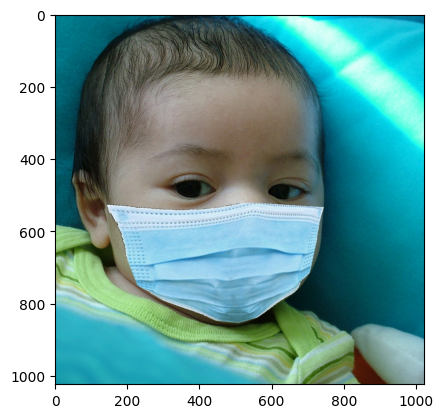

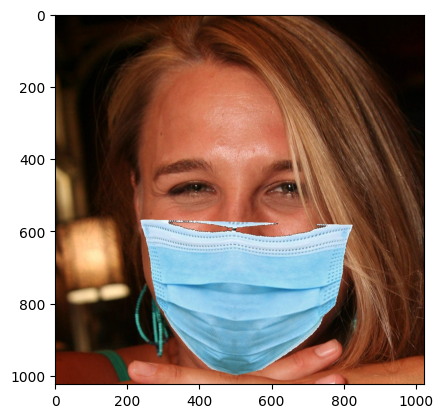

In [6]:
Datadirectory = "Dataset\\" # traninh dataset
Classes = ["With Mask","Without Mask"] # list of class
img_2 = 0
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow((cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)))
        plt.show()
        img_2 +=1
        if img_2 == 2:
            break
    break

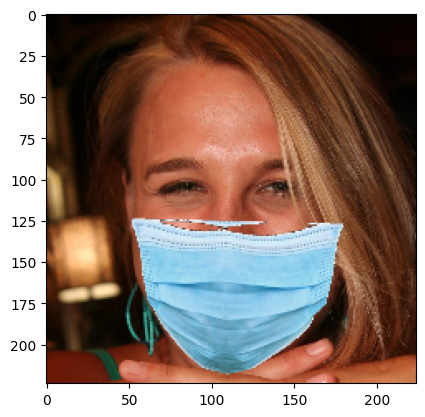

In [7]:
img_size = 224 # imagenet ==> 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow ((cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)))

## Reading Images And Convert it to Array

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array =  cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
len(training_Data) 

1950

In [11]:
import random 

random.shuffle(training_Data )

In [12]:
X = [] # data
y = [] #label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(1950, 224, 224, 3)

In [14]:
X = X/255.0;

In [15]:
Y = np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle", "wb") 
pickle.dump(X, pickle_out) 
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out) 
pickle_out.close

<function BufferedWriter.close>

## deep learning model for training

In [16]:
from tensorflow import keras
from tensorflow.keras import layers 

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## transfer Learning

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer=layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## setting for binary classification (Face Mask/without Fase Mask)

In [24]:


new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
new_model.fit(X, Y, epochs = 1 , validation_split=0.1)

55/55 [==============================] - 306s 5s/step - loss: 0.0233 - accuracy: 0.9869 - val_loss: 9.5135e-12 - val_accuracy: 1.0000


In [26]:
new_model.save("my_model.h5")

## checking the network for predictions

In [27]:
frame = cv2.imread("00002_Mask.jpg")

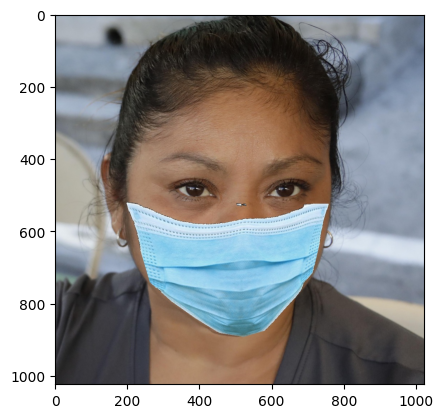

In [28]:
plt.imshow((cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))

In [29]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [30]:
prediction = new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


In [31]:
prediction

array([[1.1036778e-15]], dtype=float32)

## check model for unknown image

In [32]:
frame= cv2.imread(r"imagee.jpg")

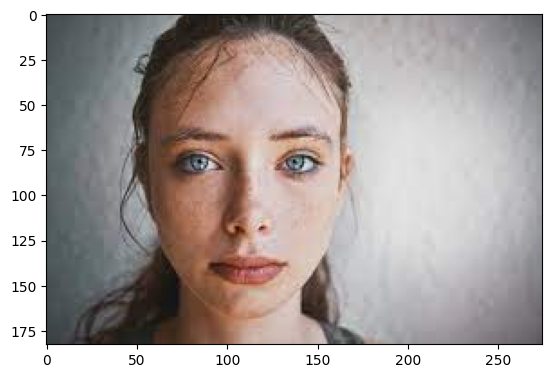

In [33]:
plt.imshow((cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))

In [34]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [35]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [36]:
gray.shape

(183, 275, 3)

In [37]:
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)

    if len(facess) == 8: 
        print("Face not detected")

    else: 
        for (ex, ey, ew, eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex + ew]

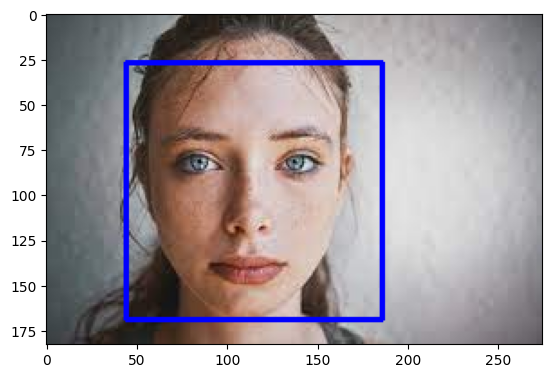

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

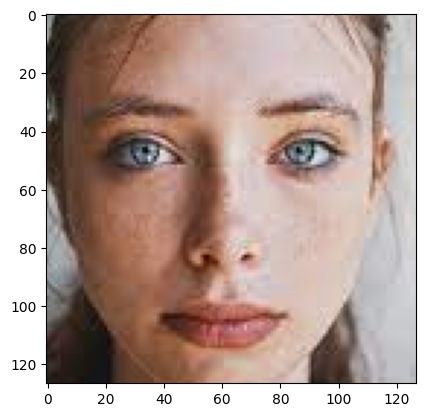

In [39]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [40]:
final_image=cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [41]:
prediction = new_model.predict(final_image)

1/1 [==============================] - 0s 101ms/step


In [42]:
prediction

array([[1.]], dtype=float32)

In [52]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"

font_scale= 1.5

font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white 
rectangle_bgr = (255, 255, 255)

#make a black image 
img= np.zeros((500, 500))

# set some text

text = "Some text in a box!" 

# get the width and height of the text box.
(text_width, text_height)= cv2.getTextSize(text, font, fontScale= font_scale, thickness=1)[0]


# set the text start position

text_offset_x= 18

text_offset_y= img.shape[0]-25

#make the coords of the box with a small padding of two pixels

box_coords= ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2)) 
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap= cv2.VideoCapture(1) # Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture (0) 
    if not cap.isOpened():
        raise IOError("Cannot open webcam")
    
# Load the Haar cascade classifier XML file for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame using the Haar cascade classifier
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess: 
                face_roi= roi_color[ey: ey+eh, ex:ex + ew]

        final_image = cv2.resize(face_roi, (224,224))

        final_image = np.expand_dims(final_image, axis=0) ## need fourth dimension

        final_image = final_image/255.0

        Predictions = new_model.predict(final_image)

        font_scale = 1.5

        if (Predictions<1):
            status = "Face Mask"

            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
            cv2.putText(frame, status, (x1+ int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))

        else:
            status = "No Mask"

            x1,y1, w1,h1 = 0,0,175,75

            # Draw black background rectangle 
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) # Add text

            cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2) 
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0,255),2,cv2.LINE_4) 
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0,255))

    cv2.imshow('Face Mask Detection', frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 89ms/step
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
1/1 [==============================] - 0s 62ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 58ms/step
Face not detected
1/1 [==============================] - 0s 60ms/step
Face not detected
1/1 [==============================] - 0s 61ms/step
Face not detected
1/1 [==============================] - 0s 87ms/step
Face not detected
1/1 [==============================] - 0s 59ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 59ms/step
Face not detected
1/1 [==============================] - 0s 59ms/step
Face not detected
1/1 [===============